In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results.csv")  
k_value_list=[1,3,5,10,15,20,50]

In [3]:
df['dataset'].unique()

array(['cora', 'pubmed', 'amazon-computers', 'amazon-photo',
       'amazon-history', 'ogbn-arxiv', 'Cora', 'Pubmed'], dtype=object)

In [4]:
def get_final_acc(df):
    
    for k in k_value_list:
        df[str(k)]=[float(i.split('/')[0].split("±")[0]) for i in df[str(k)]]
    return df    
    
df=get_final_acc(df)


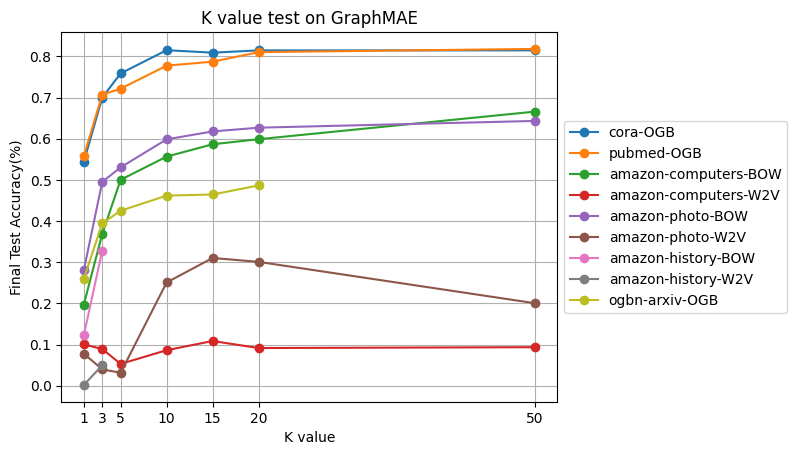

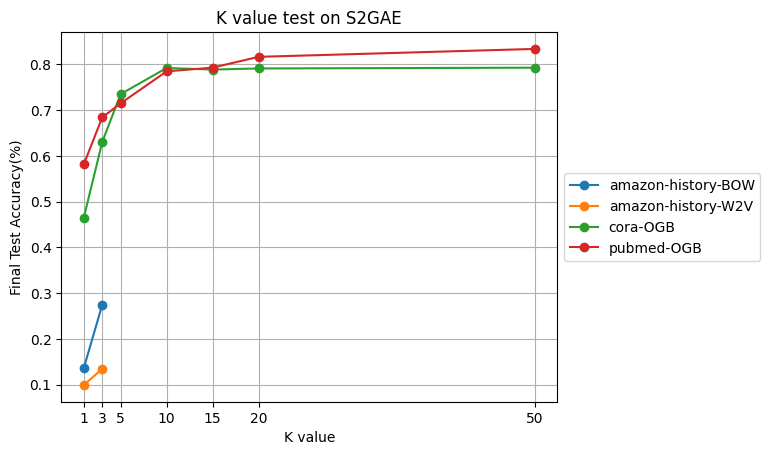

In [7]:


x=k_value_list
for method in df.method.unique():
    fig, ax = plt.subplots()
    
    for dataset in df['dataset'].unique():
        for feature_type in df['feature_type'].unique():
            row=df[(df.method==method) & (df.dataset==dataset) &(df.feature_type==feature_type)]
            
            for i in range(len(row)):
                y=row.loc[:,'1':'50'].to_numpy()[0]
                y[y == 0] = np.nan
                ax.plot(x,y,'-o',label=f"{dataset.lower()}-{feature_type.upper()}")
                
    ax.legend()

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid()
    ax.set_ylabel("Final Test Accuracy(%)")
    ax.set_xlabel("K value")
    ax.set_title(f'K value test on {method}')
    plt.xticks(k_value_list)